[![Commits since latest release][gh-image]][gh-link]

[gh-link]: https://github.com/claudioperez/elle-0002/compare/v0.0.0...master
[gh-image]: https://img.shields.io/github/commits-since/claudioperez/elle-0002/v0.0.0?style=social

In [1]:
# from anon.conf import config
# config.update('jax_disable_jit', True)

import emme as em
import elle.truss2d
import numpy as anp

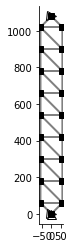

In [2]:
model = em.SkeletalModel(2,2)
# Define random variables
E = [
    model.param("E1", shape=2),
    model.param("E2", shape=2),
]
F = model.param("F", shape= 2)

# X = model.param("X", dim=20)
X =  [-60.06,59.95,-59.88,60.07,-59.80,60.02,-59.71,60.00,-59.65,59.98,-59.71,60.00,-59.80,60.02,-59.88,60.07,-60.06, 59.95]

Y = anp.cumsum(anp.array([5.0] + [10.0]*8 + [5.0])) * 12.0

#--------------------------------------------------------------------
# Add nodes to model
#--------------------------------------------------------------------
model.node( "1", 0.0,   0.0)
model.node("20", 0.0, Y[-1])
for i in range(1,19):
    model.node(str(i+1), X[i-1], Y[(i//2,(i+1)//2)[i%2]-1])
model.boun( '1', [1,1])
model.boun('20', [1,0])

prototypes = [
    elle.truss2d.resp_no3(A=1.590,E=E[1]),
    elle.truss2d.resp_no3(A=0.938,E=E[0]),
]


for i in range(1,19):
    model.truss('el-'+str(i*2-2+1*(i==1)),  str(  i), str(i+1), elem=prototypes[i!=1])
    if i-1:  model.truss( 'el-'+str(i*2-1), str(i-1), str(i+1), elem=prototypes[i==1])
i += 1

model.truss('el-'+str(i*2-2), str(  i), str(i+1), elem=prototypes[0])
model.truss('el-'+str(i*2-1), str(i-1), str(i+1), elem=prototypes[0])

model.load("10", 20.0, dof="x")
em.plot_structure(model)

In [3]:
f = model.compose_param(_jit_force=False)

In [4]:
f(E1=29e3, E2=29001.0, F=20.0)

Buffer([[-0.01226348],
        [ 0.27204009],
        [ 0.25282119],
        [ 0.29290179],
        [-0.27555236],
        [ 0.93374509],
        [ 0.23705409],
        [ 0.97680301],
        [-0.23911724],
        [ 1.53966171],
        [ 0.19611803],
        [ 1.58311521],
        [-0.17527794],
        [ 2.01509152],
        [ 0.12967577],
        [ 2.05874757],
        [-0.08495304],
        [ 2.30783732],
        [ 0.03782284],
        [ 2.26295753],
        [ 0.03224751],
        [ 2.02501664],
        [-0.0803393 ],
        [ 1.98042967],
        [ 0.12321828],
        [ 1.55949275],
        [-0.17301316],
        [ 1.51466184],
        [ 0.18756099],
        [ 0.96351707],
        [-0.24008811],
        [ 0.91831975],
        [ 0.22542807],
        [ 0.28913641],
        [-0.28203298],
        [ 0.26591625],
        [ 0.23607315]], dtype=float64)

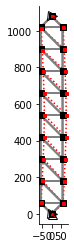

In [5]:
em.plot_displ(model, f(50e3, 29003.0, 60.0));